<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/artigo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import yfinance as yf
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [54]:
# Baixar dados da B3 (EMBR3.SA)
dados = yf.download('EMBR3.SA', period='6mo')
precos = dados['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


In [55]:
# Normalizar dados
scaler = MinMaxScaler()
precos_norm = scaler.fit_transform(precos)

In [56]:
# Preparar dados de entrada (X) e saída (y)
X = []
y = []
dias_lookback = 5

In [57]:
for i in range(dias_lookback, len(precos_norm)):
    X.append(precos_norm[i-dias_lookback:i, 0])
    y.append(precos_norm[i, 0])

X = np.array(X)
y = np.array(y)

In [58]:
# Criar e treinar rede neural
modelo = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
modelo.fit(X, y)

MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)

In [59]:
# Fazer previsão para o próximo dia
entrada_atual = precos_norm[-dias_lookback:].reshape(1, -1)
previsao_norm = modelo.predict(entrada_atual)
previsao_real = scaler.inverse_transform(previsao_norm.reshape(-1, 1))[0][0]

print(f"\n🔮 Previsão do próximo fechamento de EMBR3: R$ {previsao_real:.2f}")



🔮 Previsão do próximo fechamento de EMBR3: R$ 65.80


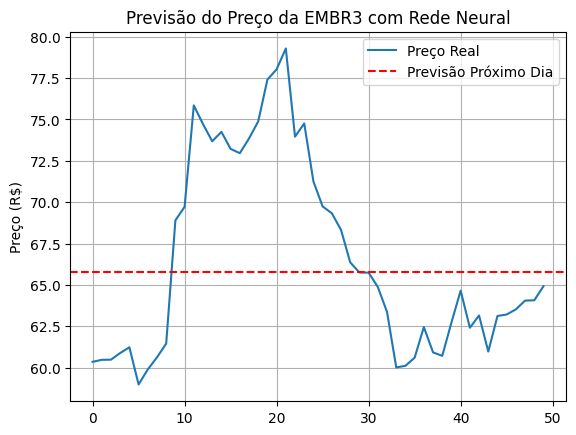

In [41]:
# Plotar resultados
plt.plot(precos[-50:], label='Preço Real')
plt.axhline(y=previsao_real, color='r', linestyle='--', label='Previsão Próximo Dia')
plt.legend()
plt.title("Previsão do Preço da EMBR3 com Rede Neural")
plt.ylabel("Preço (R$)")
plt.grid(True)